# Multiple Linear Regression
## Bike Sharing Case Study

#### Problem Statement:

A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

***Essentially the company wants to know:***

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

***Goal:***
- Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.
- It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.

## Step 1: Reading and Understanding the Data

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

#Setting Display Options
pd.options.display.float_format = "{:.4f}".format

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [4]:
#importing the data
bike_sharing = pd.read_csv("day.csv")

In [5]:
# Check the head of the dataset
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.1108,18.1812,80.5833,10.7499,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.9026,17.6869,69.6087,16.6521,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.0509,9.4703,43.7273,16.6367,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.2000,10.6061,59.0435,10.7398,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.3052,11.4635,43.6957,12.5223,82,1518,1600


In [6]:
#check the shape
bike_sharing.shape

(730, 16)

In [8]:
#check for count of null and datatype
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### _`Observations`_ - 

1.  There are **no NULL or missing** values in the dataset.

In [9]:
#check the statistics for numerical columns
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000
mean,365.5000,2.4986,0.5000,6.5260,0.0288,2.9973,0.6836,1.3945,20.3193,23.7263,62.7652,12.7636,849.2493,3658.7575,4508.0068
std,210.8771,1.1102,0.5003,3.4502,0.1673,2.0062,0.4654,0.5448,7.5067,8.1503,14.2376,5.1958,686.4799,1559.7587,1936.0116
min,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,2.4243,3.9535,0.0000,1.5002,2.0000,20.0000,22.0000
25%,183.2500,2.0000,0.0000,4.0000,0.0000,1.0000,0.0000,1.0000,13.8119,16.8897,52.0000,9.0417,316.2500,2502.2500,3169.7500
50%,365.5000,3.0000,0.5000,7.0000,0.0000,3.0000,1.0000,1.0000,20.4658,24.3682,62.6250,12.1253,717.0000,3664.5000,4548.5000
75%,547.7500,3.0000,1.0000,10.0000,0.0000,5.0000,1.0000,2.0000,26.8806,30.4458,72.9896,15.6256,1096.5000,4783.2500,5966.0000
max,730.0000,4.0000,1.0000,12.0000,1.0000,6.0000,1.0000,3.0000,35.3283,42.0448,97.2500,34.0000,3410.0000,6946.0000,8714.0000


## Step 2: Data Cleansing 

### 2.1 Drop columns that are not useful for analysis

-  _`instant`_ is just a record index and can be dropped.
-  _`dteday`_ is dropped as we have mnth,year and weekday in other columns. 
-  _`casual and registered`_ - The model should be built taking only **cnt** as the **target** variable -so these variables will not any value to the model.

In [10]:
# Droping the columns as mentioned above

bike_sharing.drop(['instant','dteday','casual','registered'], axis = 1, inplace = True)
print("\n Shape after dropping the 3 columns")
print(bike_sharing.shape)


 Shape after dropping the 3 columns
(730, 12)


### 2.2 Checking for Outliers

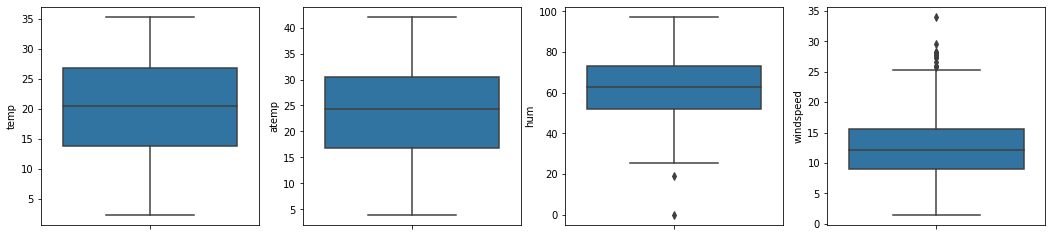

In [11]:
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike_sharing)
    i+=1

### _`Observations`_ - 

1.  Looks like there are no significant outliers in the data.
2.  Windspeed has few values above 28,but this is acceptable and expected.

## Step 3: EDA and Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where we will also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

### 3.1 EDA

-  We can observe in the dataset that some of the variables like `_'weathersit'_` and `_'season'_` have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary).It is advisable to convert such feature values into categorical string values before proceeding with model building.

In [12]:
## maping seasons
bike_sharing.season = bike_sharing.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})


## mapping weathersit
bike_sharing.weathersit = bike_sharing.weathersit.map({1:'Good',2:'Moderate',3:'Bad',4:'Severe'})

## mapping weekdays
bike_sharing.weekday = bike_sharing.weekday.map({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thurs",5:"Fri",6:"Sat"})

## mapping weekdays
bike_sharing.mnth = bike_sharing.mnth.map({1: 'Jan',2: 'Feb',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun',
                  7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

In [13]:
#Checking the new dataset
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Moderate,14.1108,18.1812,80.5833,10.7499,985
1,Spring,0,Jan,0,Sun,0,Moderate,14.9026,17.6869,69.6087,16.6521,801
2,Spring,0,Jan,0,Mon,1,Good,8.0509,9.4703,43.7273,16.6367,1349
3,Spring,0,Jan,0,Tue,1,Good,8.2000,10.6061,59.0435,10.7398,1562
4,Spring,0,Jan,0,Wed,1,Good,9.3052,11.4635,43.6957,12.5223,1600


### 3.2 Visualising Numeric Variables

Let's make a pairplot of selected _**`Independent`**_ numeric variables against _**`Target`**_ variable _**`cnt`**_

<Figure size 1440x1080 with 0 Axes>

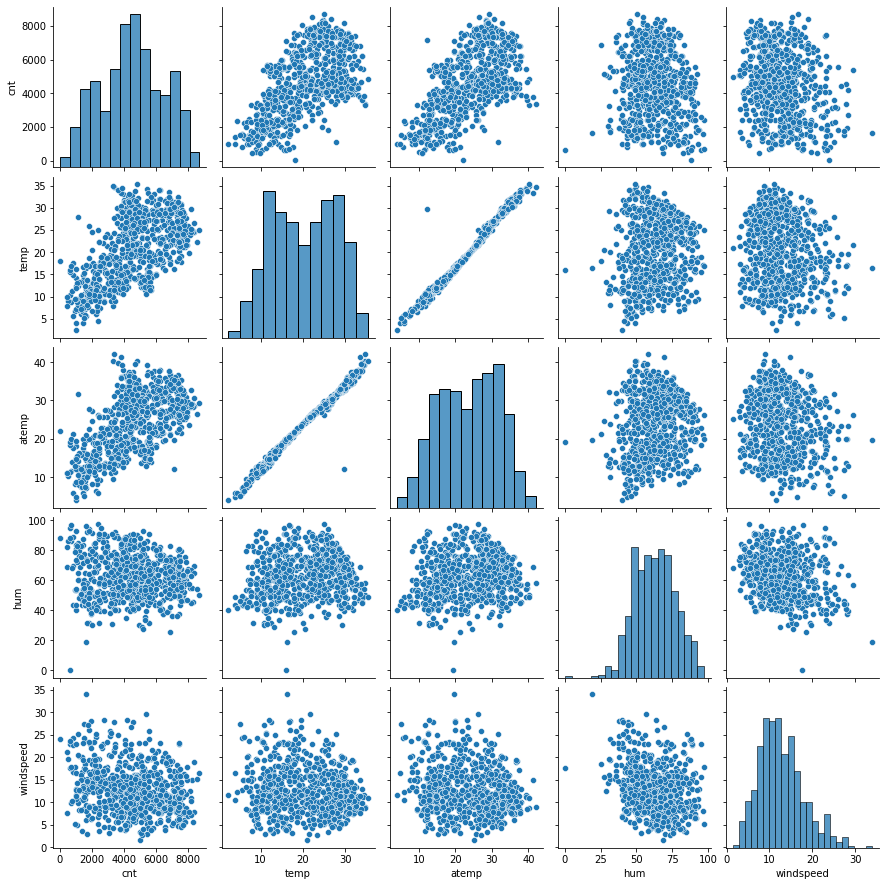

In [14]:
#I am chosing a subset of columns for plotting the pair plots - this will focus only on the key independent variables
num_var = bike_sharing[['cnt','temp','atemp','hum','windspeed']]
plt.figure(figsize = (20,15))
sns.pairplot(num_var)
plt.show()

### _`Observations`_ - 

1.  From the above plot it is evident that **temp** & **atemp** has linear relationship with **cnt** variable.
2.  When **temperature** is nice there demand for bike-sharing `grows`.
3.  **Humidity** and **Windspeed** has negative impact on **cnt** variable i.e bike sharing drops when humidity or windspeed increases.
4.  **Based on point 1 we can proceed with building a Linear Regression model.**

### 3.3 Visualising Categorical Variables

Let's make a boxplot for some of these variables.

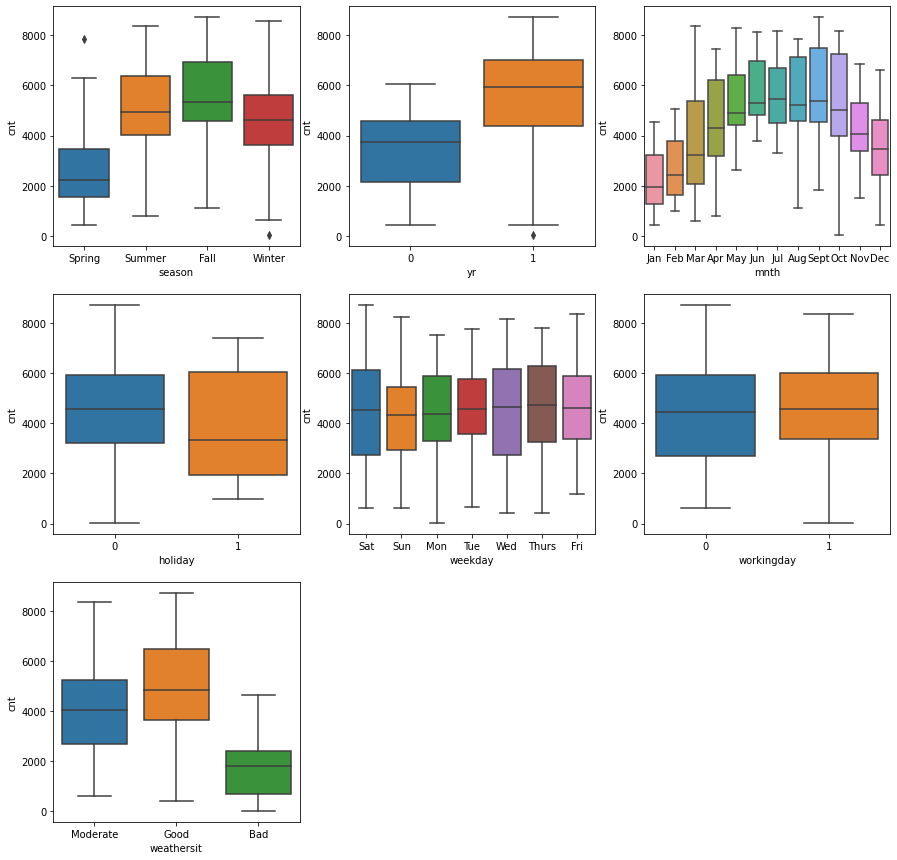

In [15]:
# Boxplot for categorical variables 
cat_var = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(cat_var):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bike_sharing, x=i[1], y='cnt')
plt.show()

### _`Observations`_ - 

1.  The count of bike sharing is least during **Spring** while it is highest during **Fall**.
2.  _**`Year-on-Year`**_ there is clear **Growth** in the demand and business.The median has rose from just under 4000 in FY2018 to around 6000 in FY2019.
3.  Demands are **`lower`** comparatively in **Jan/Dec** - probably because of snow and icy conditions which impacts roads and driver safety.One more reason could be these are **Holiday Months** in US.
4.  Demands have decreased during holidays - which may indicate that people are using the bikes for commuting to work.
5.  **`Bad weather`** drives down the demand for the bikes.

### 3.4 Visualising Correlation between Variables

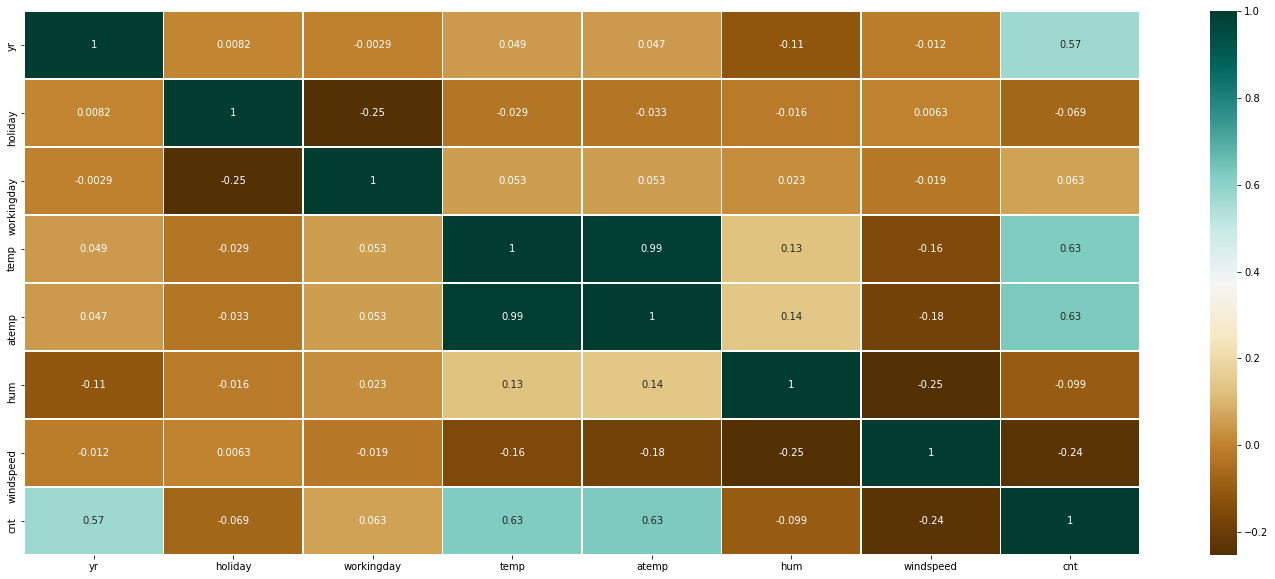

In [16]:
#Calculate Correlation
corr = bike_sharing.corr()
plt.figure(figsize=(25,10))

#Draw Heatmap of correlation
sns.heatmap(corr,annot=True, cmap='BrBG',linewidths=.5)
plt.show()

### _`Observations`_ - 

1.  _**`cnt`**_ has high correlation with **temp and atemp** variables.

## Step 4: Data Preparation for Modelling

- For the categorical variables we will convert them to dummy variables which will give us numerical values - required for developing Regression models.

In [17]:
#Creating dummy variables for season , mnth ,weathersit ,weekday
bike_sharing = pd.get_dummies(data=bike_sharing,columns=["season","mnth","weekday"],drop_first=True)
bike_sharing = pd.get_dummies(data=bike_sharing,columns=["weathersit"])

In [18]:
#Check what the dataset 'dummy' looks like
bike_sharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Bad,weathersit_Good,weathersit_Moderate
0,0,0,0,14.1108,18.1812,80.5833,10.7499,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.9026,17.6869,69.6087,16.6521,801,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.0509,9.4703,43.7273,16.6367,1349,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.2000,10.6061,59.0435,10.7398,1562,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.3052,11.4635,43.6957,12.5223,1600,1,0,...,0,0,0,0,0,0,1,0,1,0


In [19]:
bike_sharing.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thurs', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Bad', 'weathersit_Good',
       'weathersit_Moderate'],
      dtype='object')

In [20]:
#Check the shape of the dataframe
bike_sharing.shape

(730, 31)

## Step 5: Splitting the Data into Training and Testing Sets

The first basic step for regression is performing a train-test split.

### 5.1 Dividing into X and Y sets for the model building

In [21]:
#y as target variable
y=bike_sharing.pop('cnt')

#X as independent variables
X=bike_sharing

# We specify this so that the train and test data set always have the same rows, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [22]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(511, 30)
(219, 30)
(511,)
(219,)


### 5.2 Rescaling the Features 

-   It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale.

In [23]:
# Let us scale continuous variables
num_vars = ['temp','atemp','hum','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [24]:
#Inspect stats fro Training set after scaling
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Bad,weathersit_Good,weathersit_Moderate
count,511.0000,511.0000,511.0000,511.0000,511.0000,511.0000,511.0000,511.0000,511.0000,511.0000,...,511.0000,511.0000,511.0000,511.0000,511.0000,511.0000,511.0000,511.0000,511.0000,511.0000
mean,0.5088,0.0254,0.6771,0.5374,0.5131,0.6503,0.3208,0.2427,0.2466,0.2485,...,0.0802,0.1507,0.1546,0.1429,0.1331,0.1331,0.1585,0.0294,0.6262,0.3444
std,0.5004,0.1576,0.4680,0.2256,0.2122,0.1457,0.1696,0.4291,0.4314,0.4326,...,0.2719,0.3581,0.3619,0.3503,0.3400,0.3400,0.3656,0.1690,0.4843,0.4756
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,0.0000,0.3412,0.3329,0.5389,0.1992,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,1.0000,0.0000,1.0000,0.5421,0.5293,0.6535,0.2981,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
75%,1.0000,0.0000,1.0000,0.7352,0.6885,0.7544,0.4144,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


## Step 6:Feature Selection using RFE

-  For automated approach we will use Recursive feature elimination package from sklearn.

In [25]:
#Build a Lienar Regression model using SKLearn for RFE 
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [26]:
#Running RFE with the output number of the variable equal to 15
rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [27]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 15),
 ('season_Winter', False, 2),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', False, 5),
 ('mnth_Feb', False, 6),
 ('mnth_Jan', False, 3),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 8),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 13),
 ('mnth_Nov', False, 4),
 ('mnth_Oct', False, 9),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', False, 16),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thurs', False, 11),
 ('weekday_Tue', False, 12),
 ('weekday_Wed', False, 10),
 ('weathersit_Bad', True, 1),
 ('weathersit_Good', True, 1),
 ('weathersit_Moderate', True, 1)]

In [28]:
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_Spring', 'mnth_Jul', 'mnth_Sept', 'weekday_Sat', 'weekday_Sun',
       'weathersit_Bad', 'weathersit_Good', 'weathersit_Moderate'],
      dtype='object')

## Step 7:Building a linear model

-  **Fit a regression line through the training data using `statsmodels`.** 
-  **In `statsmodels`, we need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.**


### 7.1 Model 1 - Using all features selected by RFE process

In [29]:
#Because we will be iterating a number of times to get the best fit line,we can write a small function to address this
#Function to use statsmodel API

def stats_model(var):
    X_train_lm = sm.add_constant(X_train[var]) # Adding a constant variable 
    lr = sm.OLS(y_train, X_train_lm).fit() # Running the linear model
    print(lr.summary())
    return lr

In [30]:
#Similar to above writing a small function to print the VIF report after each model build.
def vif_cal(var):
    X = X_train[var]
    vif = pd.DataFrame()    
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    print(vif.sort_values(by = "VIF", ascending = False))

In [31]:
#Model 1 - all columns selected by RFE
var = ['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed','season_Spring', 'mnth_Jul', 'mnth_Sept', 
       'weekday_Sat', 'weekday_Sun','weathersit_Bad', 'weathersit_Good', 'weathersit_Moderate']

In [32]:
#Statistics for Model 1
stats_model(var)
vif_cal(var)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     195.9
Date:                Sun, 02 May 2021   Prob (F-statistic):          5.28e-186
Time:                        23:58:24   Log-Likelihood:                -4133.5
No. Observations:                 511   AIC:                             8295.
Df Residuals:                     497   BIC:                             8354.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1375.2080    

### _`Observations`_ - 

1.  The results are not good with 2 variables - `holiday`& `atemp` having high p-values.These can be easily dropped.
2.  The `adjusted R-square` and `R-Square` both are `83%`which is good for the first model.
3.  '`atemp`' also has a high `VIF` factor - which shows multicollinearity is present in the dataset.
4.  `Holiday` has a **negative** coefficient so we can drop these column also and focus on workdays only.

### 7.1 Model 2

In [33]:
#Model 2 - Revised Columns - 

#1.Dropping variables "holiday,atemp"

var = ['yr', 'workingday', 'temp', 'hum', 'windspeed','season_Spring', 'mnth_Jul', 'mnth_Sept', 
       'weekday_Sat', 'weekday_Sun','weathersit_Bad', 'weathersit_Good', 'weathersit_Moderate']

In [34]:
#Statistics for Model 2
stats_model(var)
vif_cal(var)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.9
Date:                Sun, 02 May 2021   Prob (F-statistic):          8.06e-187
Time:                        23:58:50   Log-Likelihood:                -4134.4
No. Observations:                 511   AIC:                             8295.
Df Residuals:                     498   BIC:                             8350.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1229.1712    

### _`Observations`_ - 

1.  The variables - `weathersit_Good`,`weathersit_Moderate `has extremely high VIF factors - which can be dropped.
2.  The `adjusted R-square` and `R-Square` both are `83%`which is similar to the first model.

### 7.1 Model 3

In [35]:
#Model 3 - Revised Columns - 

#1.Dropping variables - "weathersit_Good,weathersit_Moderate,weekday_Sat"
#2.Adding variable - "season_winter"
var = ['yr', 'workingday', 'temp', 'hum', 'windspeed','season_Spring', 'season_Winter', 'mnth_Nov', 'mnth_Jul', 'mnth_Sept',
       'weekday_Sun','weathersit_Bad']

In [36]:
#Statistics for Model 3
stats_model(var)
vif_cal(var)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     202.9
Date:                Sun, 02 May 2021   Prob (F-statistic):          6.25e-183
Time:                        23:58:55   Log-Likelihood:                -4143.6
No. Observations:                 511   AIC:                             8313.
Df Residuals:                     498   BIC:                             8368.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3336.4776    281.057     11.

### _`Observations`_ - 

1.  `workinday`has high p-value- which can be dropped.
2.  The `adjusted R-square` and `R-Square` both are `83%`similar to the previous models.
3.  `hum` and `temp` with high `VIF` can be dropped.

### 7.1 Model 4

In [37]:
#Model 4 - Revised Columns - 

#1.Dropping variables - "workingday,hum,temp"
#2.Adding variable - None
var = ['yr','windspeed','season_Spring', 'season_Winter', 'mnth_Nov', 'mnth_Jul', 'mnth_Sept',
       'weekday_Sun','weathersit_Bad']

In [38]:
#Statistics for Model 4
stats_model(var)
vif_cal(var)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     148.8
Date:                Sun, 02 May 2021   Prob (F-statistic):          2.15e-135
Time:                        23:58:59   Log-Likelihood:                -4264.2
No. Observations:                 511   AIC:                             8548.
Df Residuals:                     501   BIC:                             8591.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4603.3803    126.638     36.

### _`Observations`_ - 

1.  `month -july`has high p-value- which can be dropped.
2.  The `adjusted R-square` and `R-Square` both are `72%`which is a significant drop from previous models.
3.  `F-Statistic` has also`dropped` from `202 to 148`.

### 7.1 Model 5

In [39]:
#Model 5 - Revised Columns - 

#1.Dropping variables - "mnth_july"
#2.Adding variable - "temp"
var = ['yr','windspeed','season_Spring', 'season_Winter', 'mnth_Nov', 'mnth_Sept','weekday_Sun','weathersit_Bad','temp']

In [40]:
#Statistics for Model 5
stats_model(var)
vif_cal(var)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     225.4
Date:                Sun, 02 May 2021   Prob (F-statistic):          7.31e-170
Time:                        23:59:20   Log-Likelihood:                -4182.9
No. Observations:                 511   AIC:                             8386.
Df Residuals:                     501   BIC:                             8428.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1997.7756    218.702      9.

### _`Observations`_ - 

1.  `month -nov`has high p-value- which can be dropped.
2.  The `adjusted R-square` and `R-Square` both are up at `80%`.
3.  `F-Statistic` has also`gone up` from `225.4`.

### 7.1 Model 6

In [41]:
#Model 6 - Revised Columns - 

#1.Dropping variables - "mnth_Nov"
#2.Adding variable - None
var = ['yr','windspeed','season_Spring', 'season_Winter', 'mnth_Sept','weekday_Sun','weathersit_Bad','temp']

In [42]:
#Statistics for Model 6
stats_model(var)
vif_cal(var)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 02 May 2021   Prob (F-statistic):          1.60e-170
Time:                        23:59:32   Log-Likelihood:                -4184.2
No. Observations:                 511   AIC:                             8386.
Df Residuals:                     502   BIC:                             8425.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1967.3028    218.214      9.

### _`Observations`_ - 

1.  _**`p-value`**_  for all the features are almost _**`Zero`**_.
2.  The _**`adjusted R-square`**_ and _**`R-Square`**_ both are up at around _**`80%`**_.The difference between them is very minimum which shows that adding any new variable won't be beneficial.
3.  _**`VIF`**_ values are all below **_`5`**_ proving there is no multicollinearity.
4.  _**`F-Statistics`**_ which shows that the model is statistically significant is also high at _**`252.4`**_.
5.  **Model-6 is selected as our final model.**

In [43]:
#Let us build the finalmodel using the variables from model 6 and sklearn Linear Regression module

var = ['yr','windspeed','season_Spring', 'season_Winter', 'mnth_Sept','weekday_Sun','weathersit_Bad','temp']

lr6 = LinearRegression()
lr6.fit(X_train[var],y_train)
print(lr6.intercept_,lr6.coef_)

1967.3027768403235 [ 2058.09986621 -1132.26717761  -963.65701114   427.49383435
   479.38681865  -354.37877134 -2253.77654205  3807.36594446]


## Step 8: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [44]:
y_train_pred = lr6.predict(X_train[var])

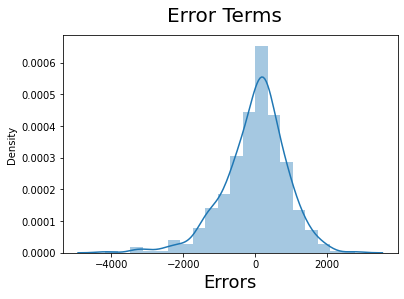

In [46]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

### _`Observations`_ - 

1.  **Errors are normally distribured with mean 0 - which meets one of the key assumptions of Linear Regression.**

## Step 9: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. `sixth model`.

#### Applying the scaling on the test sets

In [47]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [48]:
#Columns from our final model
var = ['yr','windspeed','season_Spring', 'season_Winter', 'mnth_Sept','weekday_Sun','weathersit_Bad','temp']

#Predict the values for test data
y_test_pred = lr6.predict(X_test[var])

In [49]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_test_pred)
r_squared = r2_score(y_test, y_test_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 772409.3635450011
r_square_value : 0.7847452157247193


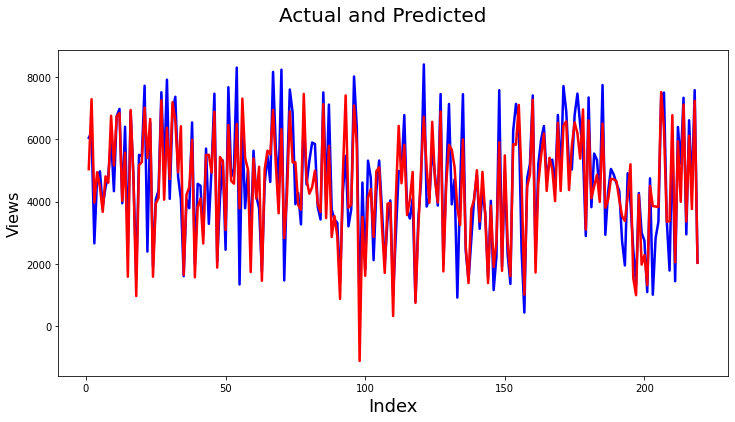

In [50]:
#Actual vs Predicted
c = [i for i in range(1,220,1)]
fig = plt.figure(figsize = (12,6))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_test_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)  
plt.show()

### _`Observations`_ - 

1.  **Actual and Predicted errors are highly overlapping- which means the model is working pretty well.**

## Step 10: Model Evaluation

### 10.1 Linearity Check - Assumption 1 of Linear Regression


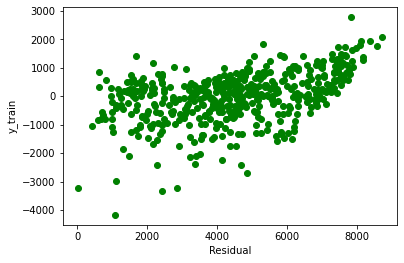

In [51]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual,c='g')
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

### _`Observations`_ - 

1.  **We can see clear linear relationship between the X and y variables in the data.**

### 10.2 Error terms are normally distributed with mean zero - Assumption 2 of Linear Regression

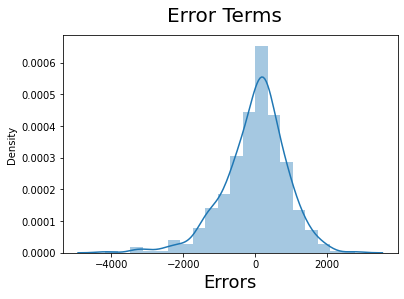

In [53]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 
plt.show()

### _`Observations`_ - 

1.  **Errors are normally distributed with mean 0 - which meets one of the key assumptions of Linear Regression.**

### 10.3 Error terms have constant variance (homoscedasticity) - Assumption 3 of Linear Regression

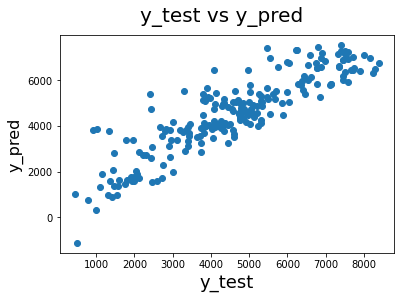

In [54]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

### _`Observations`_ - 

1.  **The variance of the residuals (error terms) is constant across predictions & does not vary much as the value of the predictor variable changes - we can conclude the error terms are homoscedasticity in nature**.

### 10.4 Error terms are independent of each other - Assumption 4 of Linear Regression

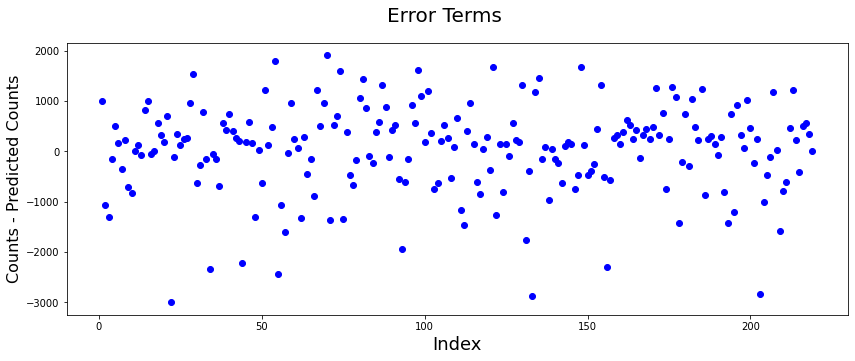

In [55]:
# Error terms

c = [i for i in range(1,220,1)]
fig = plt.figure(figsize=(14,5))
plt.plot(c,y_test-y_test_pred, color="blue", marker='o', linewidth=2.5, linestyle="")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label
plt.show()

### _`Observations`_ - 

1.  **It is evident that the error terms are randomly ditributed and doesn't have any pattern.This means that the errors of the response variables are not correlated. Presence of correlation in error of response variables reduces model’s accuracy.**.

## Step 11: Assesing the Model

In [56]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
var = ['yr','windspeed','season_Spring', 'season_Winter', 'mnth_Sept','weekday_Sun','weathersit_Bad','temp']
stats_model(var)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 03 May 2021   Prob (F-statistic):          1.60e-170
Time:                        00:00:59   Log-Likelihood:                -4184.2
No. Observations:                 511   AIC:                             8386.
Df Residuals:                     502   BIC:                             8425.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1967.3028    218.214      9.

### _`Conclusion`_ - 

1.  **There is clear evidence that the business has grown Year-On-Year**.
2.  **In terms of month,September looks to be good for more business**.
3.  **Temperature is the most significant variable with largest coefficient - which means warm or moderate temperatures will result in growth of business.**.
4.  **We can also infer that the rentals go down on Sundays or we can assume the same for holidays.**
5.  **High Windspeed and Bad weather has negative impact on the business.**